### PROJECT REPORT- GROUP 38

# How do age, blood pressure, heart rate, and cholesterol affect the risk of developing heart disease?


##### Charlie Carter, Raphael Deonova, Firila Najma Wahidah, Kuan Wei Ling

## Introduction
#### Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to  understand the rest of your proposal
  
The typical human heart beats 100,000 times every day, circulating 2,000 gallons of blood throughout the body. There are 60,000 miles of blood veins throughout our body (source: healthblog.uofmhealth).

Adults 65 years of age and older have a higher risk of developing cardiovascular disease, which is characterised by issues with the heart, blood vessels, or both. The heart and blood vessels can alter with age, which could raise a person's risk of cardiovascular disease (source: National Institute on Aging).

Blood pressure is an essential measure of cardiovascular health, along with heart rate. High blood pressure, which is medically known as hypertension, is associated with a number of cardiovascular disorders and diseases, including heart disease (source: Public Health England Guidance).

A person's risk of heart disease can double if they have high cholesterol. This is due to the fact that high cholesterol can accumulate in artery walls, reducing blood flow to the heart, brain, kidneys, and other organs, as well as the legs (source: National Center for Chronic Disease Prevention and Health Promotion).
#### Clearly state the question you will try to answer with your project
  
How do age, blood pressure, heart rate, and cholesterol affect the risk of developing heart disease? 


#### Identify and describe the dataset that will be used to answer the question 


To answer those questions, we will use the heart disease multivariate dataset, which contains 4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach. It means the heart disease data for those locations. All of the data has 14 variables: 

- age: The person’s age in years

- sex: The person’s sex (1 = male, 0 = female)

- cp: chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic)

- trestbps : The person’s resting blood pressure (mm Hg on admission to the hospital) *resting blood pressure means the blood pressure of person after sitting quietly.

- chol: serum cholesterol (in mg/dl)

- fbs: fasting blood sugar (>120 mg/dl,  1 = true, 0 = false)

- restecg: resting electrocardiographic results
  
  Value 0: normal

  Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

  Value 2: showing probable or definite left ventricular hypertrophy by Estes’ criteria
  
- thalach: maximum heart rate achieved

- exang: exercise included angina (1 = yes, 2 = no)

- oldpeak: ST depression induced by exercise relative to rest.

- slope: the slope of the peak exercise ST segment

- ca: The number of major vessels (0 - 3)

- thal: A blood disorder calles thalassemia

  Value 0: NULL

  Value 1: fixed defect (no blood flow in some part of heart)

  Value 2: normal blood flow

  Value 3: reversible defect (a blood flow is observed but it is not normal)

- num: diagnosis of heart disease (0 = no, 1 = yes)

From all the variables above, we will predict num (diagnosis of heart disease) with predictors: age, trestbps, chol, and thalach.



## Methods & Results
Our data analysis will be done with the end goal of using K-nearest neighbours classication to predict the diagnosis of a patient based on certain patient vitals and data. Our classification will be done with the following columns: age (age), resting heart rate (trestbps), max heart rate (thalach), and cholesterol (chol) level. 

We will use scatterplots to compare two variables at a time and color the points based on the diagnosis. The first plot with predictors max heart rate (thalach) and cholesterol (chol) level. The second plot with predictors age (age), and resting heart rate (trestbps). This will give us a general idea of what categories influence diagnosis the most. This pairing is based on the scientific reason between each 2 variables and the relationship shown by the scatter plot.

### Loading the data from the original source on the web

In [12]:
library(repr)
library(tidyverse)
library(tidymodels)

In [13]:
cleveland_url <- "https://github.com/charlie-carter/dsci100project/raw/main/data/processed.cleveland.data"
hungarian_url <- "https://github.com/charlie-carter/dsci100project/raw/main/data/processed.hungarian.data"
switzerland_url <- "https://github.com/charlie-carter/dsci100project/raw/main/data/processed.switzerland.data"
va_url <- "https://github.com/charlie-carter/dsci100project/raw/main/data/processed.va.data"

column_names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", 
                 "exang", "oldpeak", "slope", "ca", "thal", "num")

cleveland_data <- read.table(cleveland_url, sep = ",", col.names = column_names)
switzerland_data <- read.table(switzerland_url, sep = ",", col.names = column_names)
hungarian_data <- read.table(hungarian_url, sep = ",", col.names = column_names)
va_data <- read.table(va_url, sep = ",", col.names = column_names)

In [14]:
combined_data <- cleveland_data |>
        rbind(switzerland_data) |>
        rbind(hungarian_data) |>
        rbind(va_data)

head(combined_data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
6,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


As some factor columns are read as `<dbl>`and `<chr>`, they need to be changed into `<int>` for visualisation of the data. 

### Wrangling and cleaning the data

Based on **num**, a true/false column needs to be created and will be called **diagnosis**. This will identify if the patient is sick or healthy and will be helpful since we want to classify whether a patient will be more likely to develop heart disease based on certain factors. The **diagnosis** column will also be instrumental in applying the findings to real life as certain factors can have more influence in the development of heart disease. 


In [31]:
# predictors are age, trestbps, chol, thalach
# target is diagnosis based on num
no_missing_value_data <- combined_data |> filter(age != "?" & trestbps != "?" & chol != "?" & thalach != "?" & num != "?" & thal != "?" & oldpeak != "?")
data <- no_missing_value_data |>
    select(age, chol, thalach, num, thal, oldpeak) |>
    mutate(age = as.integer(age)) |>
    mutate(chol = as.integer(chol)) |>
    mutate(thalach = as.integer(thalach)) |>
    mutate(thal = as.integer(thal)) |>
    mutate(oldpeak = as.integer(oldpeak)) |>
    mutate(diagnosis = as_factor(ifelse(num == 0, "healthy", "sick")))
head(arrange(data, desc(chol)))

,age,chol,thalach,num,thal,oldpeak,diagnosis
,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,67,564,160,0,7,1,healthy
2,40,466,152,1,6,1,sick
3,65,417,157,0,3,0,healthy
4,56,409,150,2,7,1,sick
5,63,407,154,4,7,4,sick
6,62,394,157,0,3,1,healthy


### Splitting the data intro training and testing data
`initial_split` is used to split the data into 75% training and 25% testing. This is to ensure that the accuracy estimates from the test data are reasonable. It shuffles the data before splitting to prevent any influence the ordering of the data may have and it stratifies the data by class label so that similar proportions of each class are present in both the training and testing sets. 

In [33]:
## splitting the data
set.seed(3456)

data_split <- initial_split(data, prop = 0.75, strata = diagnosis)
training_data <- training(data_split)
testing_data <- testing(data_split)

## Tables

In [34]:
means <- training_data |> 
    select(age, chol, thalach) |>
    map_df(mean) |>
    mutate(average_age = age) |>
    mutate(average_chol = chol) |>
    mutate(average_thalach = thalach) |>
    select(average_age, average_chol, average_thalach)
means

average_age,average_chol,average_thalach
<dbl>,<dbl>,<dbl>
54.14151,200.7862,141.9748


In [ ]:
# Creating a summary table to compare the diagnosis with the mean of the predictors
cleveland_summary <- training_data |>
                    group_by(diagnosis) |>
                    summarize(mean_chol = mean(chol), 
                              mean_thalach = mean(thalach),
                              n_of_patients = n())

cleveland_summary

## Visualizations
- Age distribution

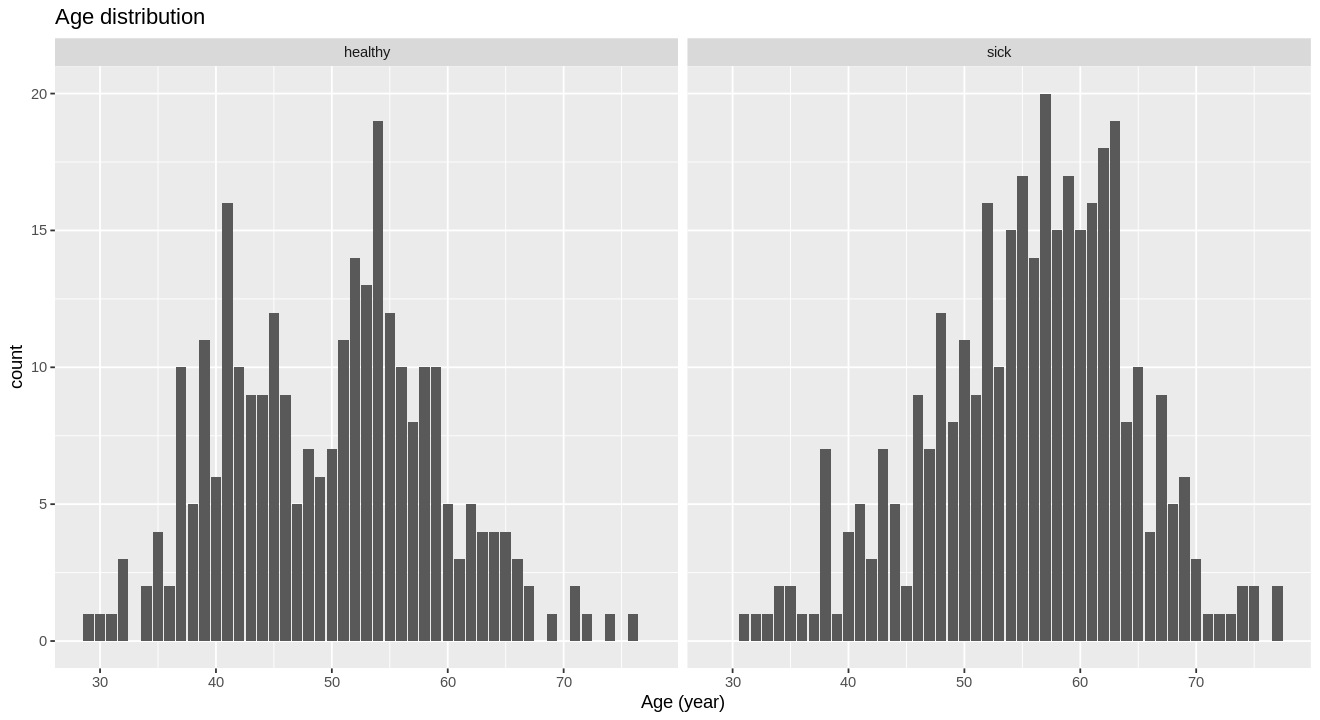

In [7]:
options(repr.plot.width = 11, repr.plot.height = 6) 
age_plot <- ggplot(training_data, aes(x = age)) +
    geom_bar() +
    facet_grid(cols = vars(diagnosis)) +
    ggtitle("Age distribution") +
    xlab("Age (year)")

age_plot

- Blood pressure 

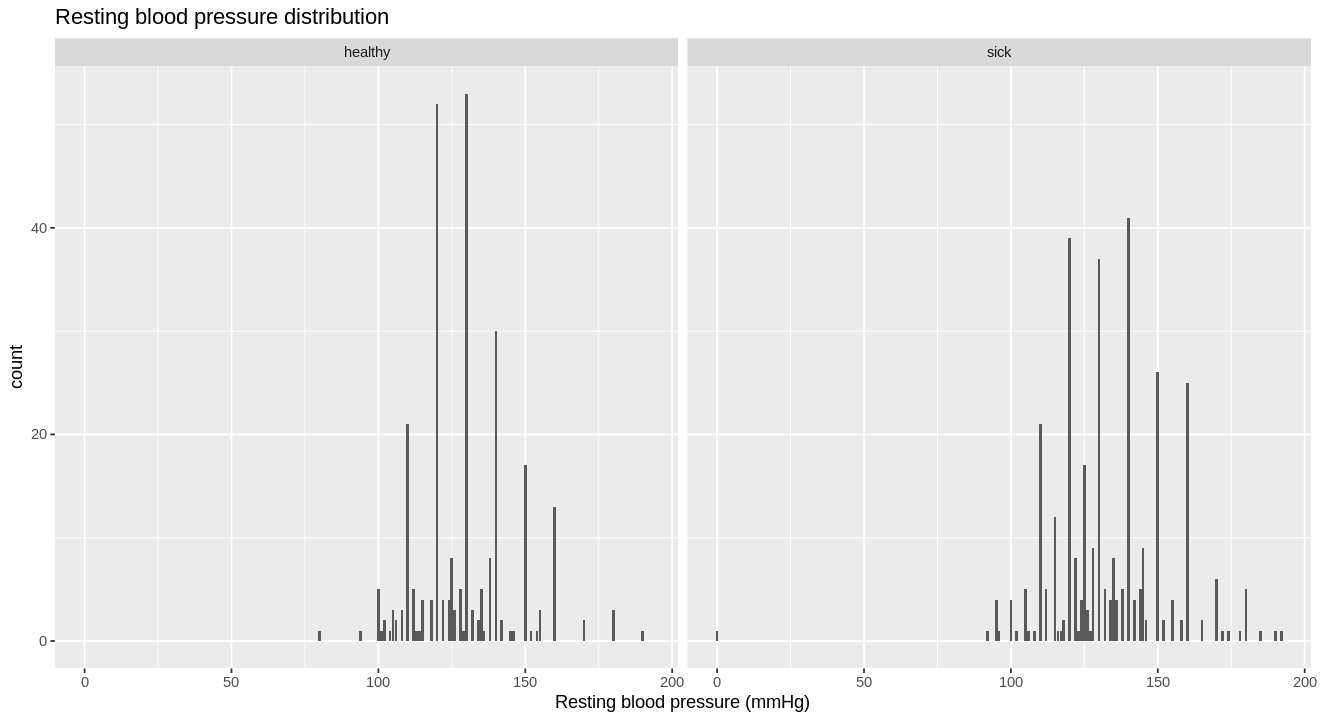

In [8]:
# blood_pressure_plot <- ggplot(training_data, aes(x = trestbps)) +
#     geom_bar() +
#     facet_grid(cols = vars(diagnosis)) +
#     ggtitle("Resting blood pressure distribution") +
#     xlab("Resting blood pressure (mmHg)")

# blood_pressure_plot

- Cholesterol distribution

#### NOTE:
from this plot, we see that there are a lot of observation with 0 mm/dl, which is highly unlikely biologically, and might be a data collection error.

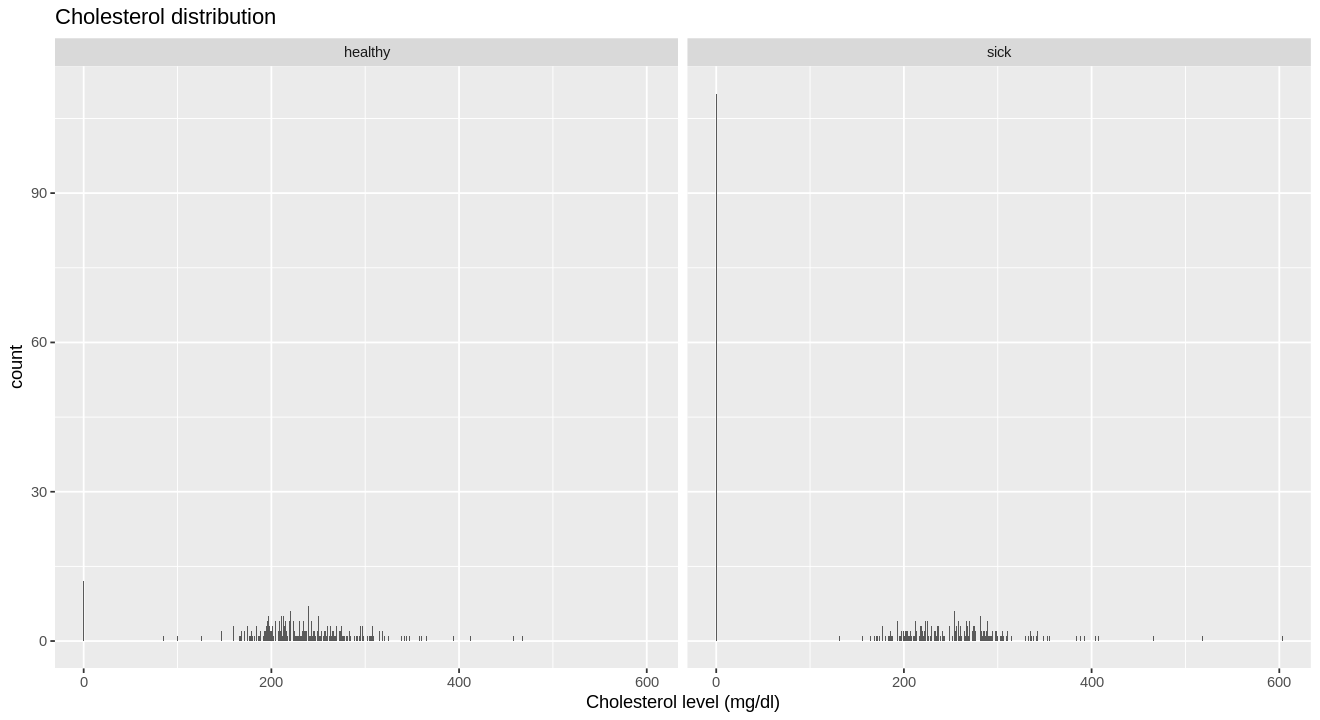

In [9]:
chol_plot <- ggplot(training_data, aes(x = chol)) +
    geom_bar() +
    facet_grid(cols = vars(diagnosis)) +
    ggtitle("Cholesterol distribution") +
    xlab("Cholesterol level (mg/dl)")

chol_plot

- Maximum heart rate plot

### NOTE:
from this plot, we see that there are a lot of observation with 0 heart rate, which is biologically impossible, which means that it may be a data collection error.

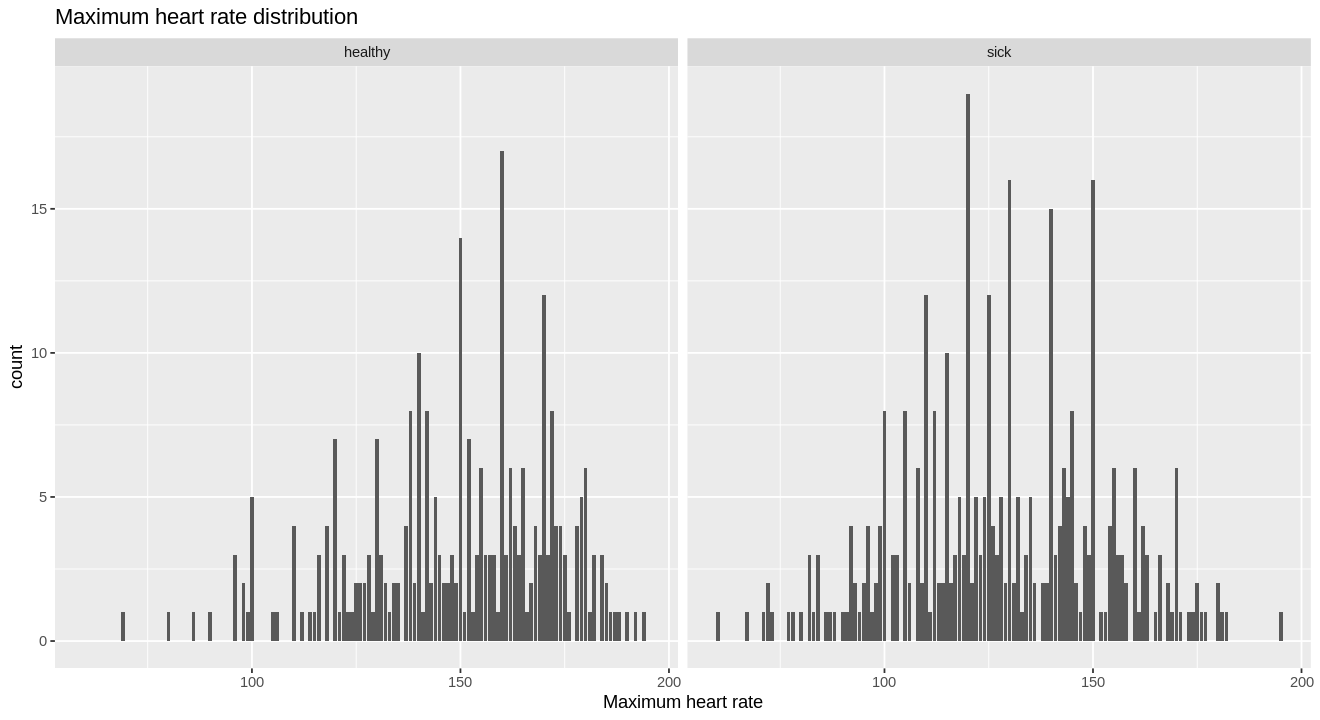

In [10]:
heart_rate_plot <- ggplot(training_data, aes(x = thalach)) +
    geom_bar() +
    facet_grid(cols = vars(diagnosis)) +
    ggtitle("Maximum heart rate distribution") +
    xlab("Maximum heart rate")
heart_rate_plot

- Thalassemia plot

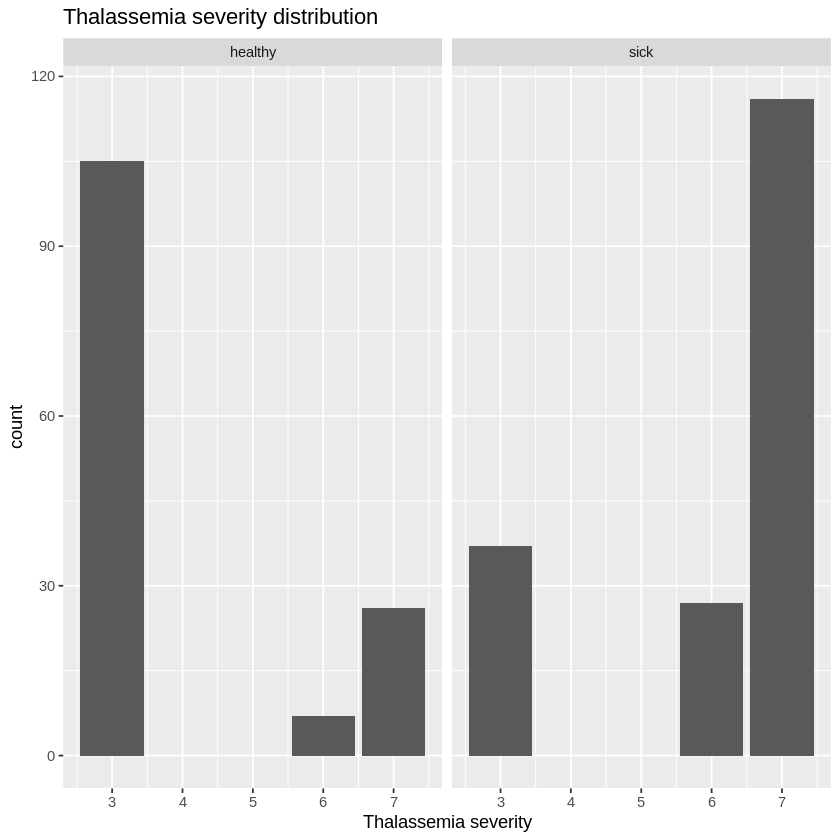

In [21]:
thal_plot <- ggplot(training_data, aes(x = thal)) +
    geom_bar() +
    facet_grid(cols = vars(diagnosis)) +
    ggtitle("Thalassemia severity distribution") +
    xlab("Thalassemia severity ranking")
thal_plot

- Oldpeak plot

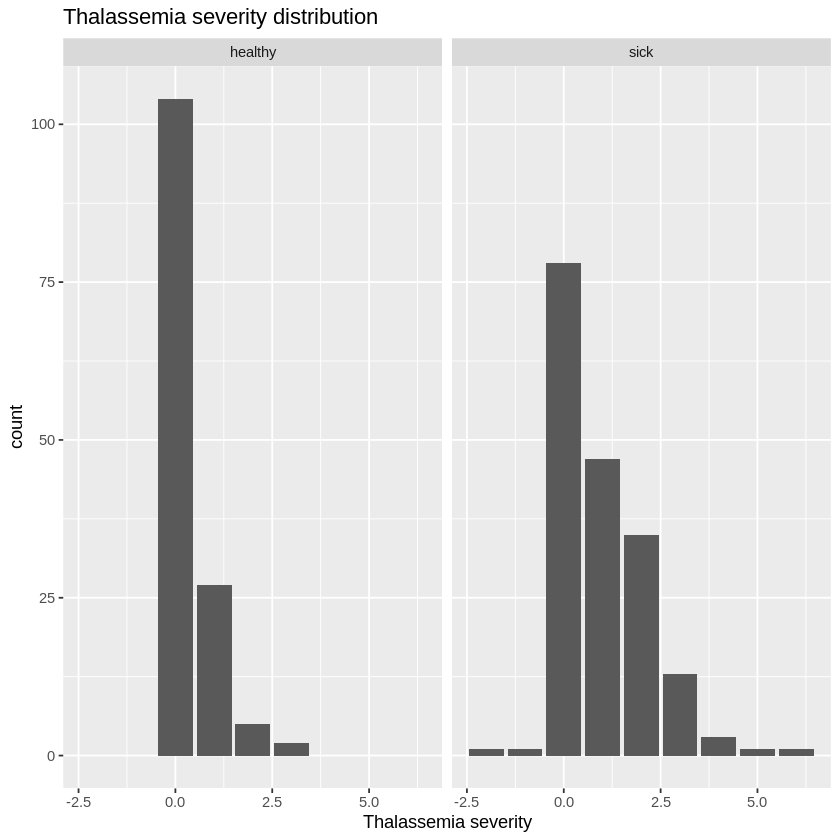

In [23]:
oldpeak_plot <- ggplot(training_data, aes(x = oldpeak)) +
    geom_bar() +
    facet_grid(cols = vars(diagnosis)) +
    ggtitle("Exercise relative to rest distribution") +
    xlab("Exercise relative to rest ranking")
oldpeak_plot

- Diagnosis plot

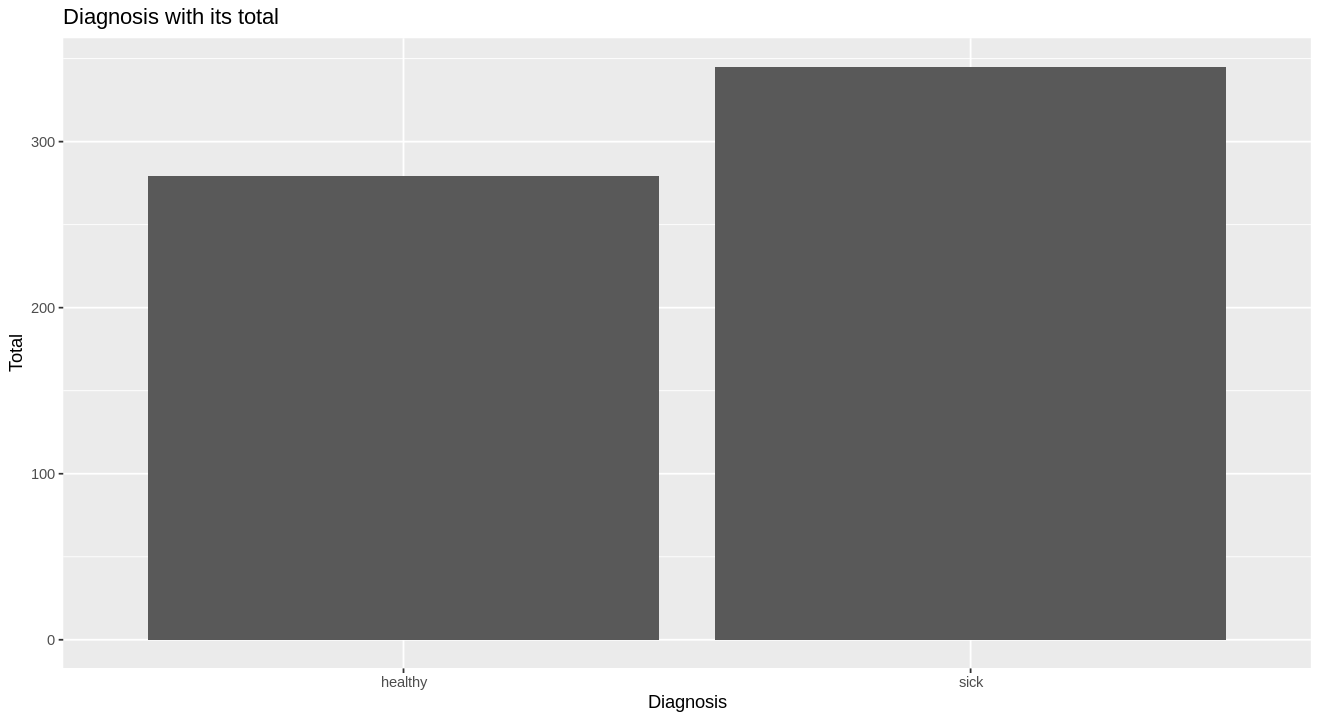

In [11]:
diagnosis_plot <- ggplot(training_data, aes(x = diagnosis)) +
    geom_bar() +
    ggtitle("Diagnosis with its total") +
    xlab("Diagnosis") +
    ylab("Total")
diagnosis_plot

## Standardizing the Data
To predict the diagnosis label we need to scale the data before visualizing it into a scatter plot. When using the K-nearest neighbors classification, the scale of each variable (i.e., its size and range of values) matters. Ensure that each predictor gives the same effect in predicting the observations.

In [12]:
data_recipe <- recipe(diagnosis ~ ., data = data) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors()) |>
  prep()
scaled_data <- bake(data_recipe, data)
head(scaled_data)

age,trestbps,chol,thalach,num,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1.0474268,0.6767316,0.29826536,0.4756466,-0.8693390,healthy
1.4753773,1.4630149,0.77778546,-1.1409795,0.9098726,sick
1.4753773,-0.6337406,0.26207516,-0.3326664,0.0202668,sick
-1.7342514,-0.1095517,0.45207369,1.8998171,-0.8693390,healthy
-1.3063009,-0.1095517,0.03588644,1.3224507,-0.8693390,healthy
0.2985134,-0.6337406,0.32540801,1.5533972,-0.8693390,healthy


### Visualizations of the Analysis

- #### Maximum Heart Rate vs Cholesterol Plot

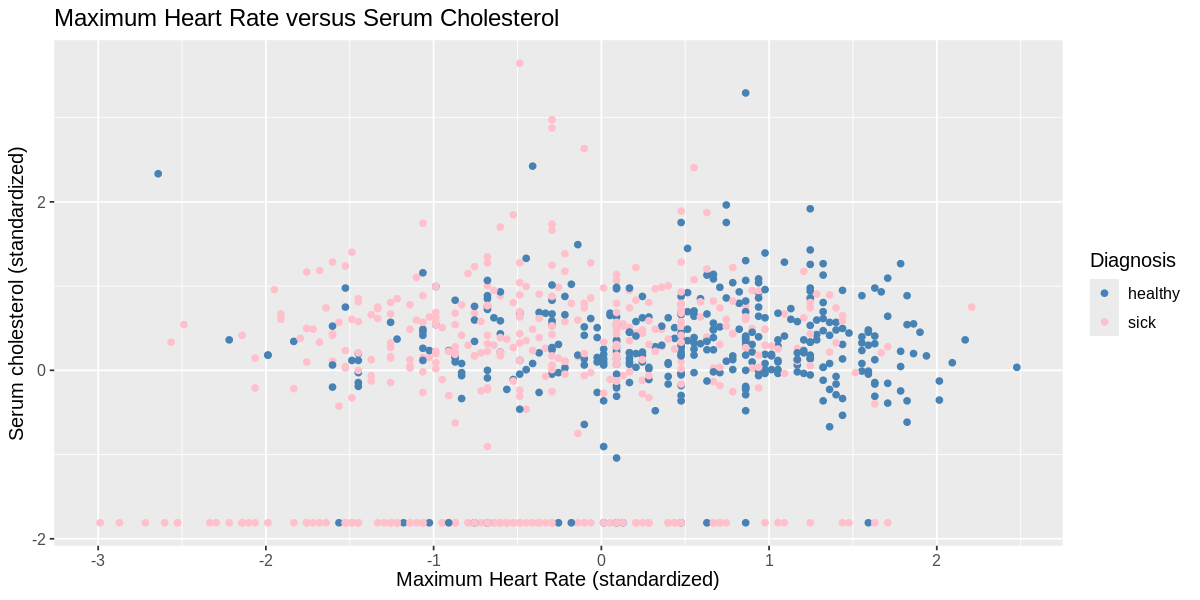

In [13]:
options(repr.plot.width = 10, repr.plot.height = 5)
heartrate_chol_plot <- ggplot(scaled_data, aes(x = thalach, y = chol, color = diagnosis)) +
   geom_point(alpha = 1) +
   labs(x = "Maximum Heart Rate (standardized)",
        y = "Serum cholesterol (standardized)",
        color = "Diagnosis",
        title = "Maximum Heart Rate versus Serum Cholesterol") +
   scale_color_manual(values = c("steelblue", "pink")) +
   theme(text = element_text(size = 12))
heartrate_chol_plot

Note: Although the scatter plot shows no distinct relationship between maximum heart rate and serum cholesterol, but one can argue that the higher the maximum heart rate, the healthier the individual. In comparison, individuals with lower maximum heart rate are generally more likely to develop heart disease; this is supported by higher serum cholesterol reported by individuals with lower maximum heart rate. However, unlike the trend seen with maximum heart rate, there are no significant differences for serum cholesterol there are no significant differences in people with different maximum heart rates. The highest serum cholesterol recorded had lower maximum heart rate while the lowest serum cholesterol recorded had higher maximum heart rate, and was healthy. 

- #### Age vs Resting Blood Pressure 

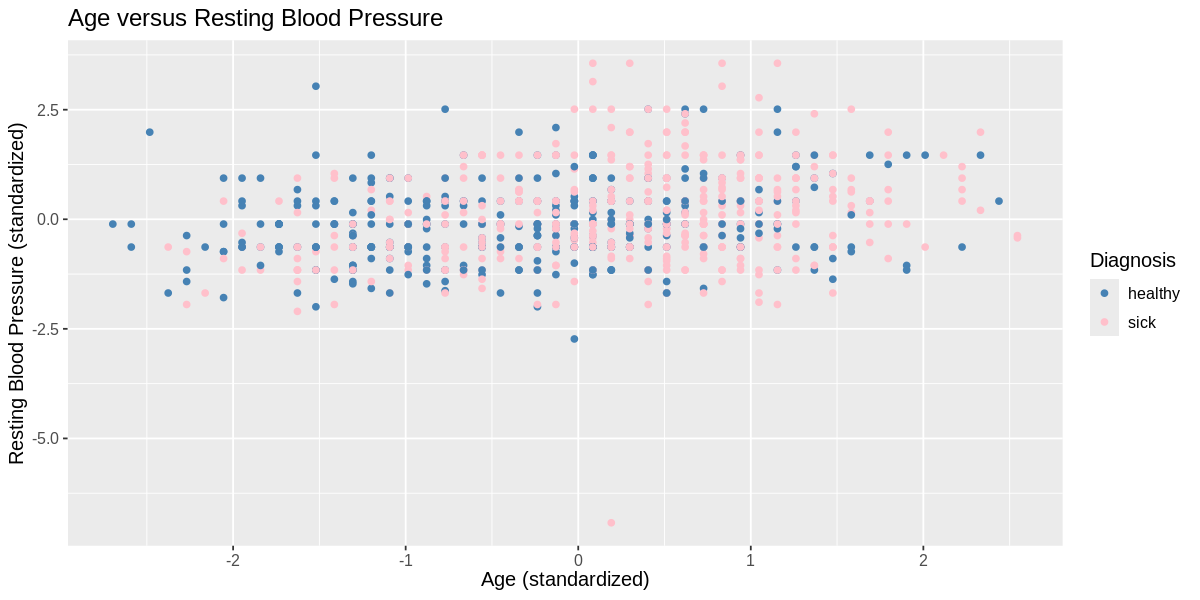

In [14]:
options(repr.plot.width = 10, repr.plot.height = 5)
age_trestbps_plot <- ggplot(scaled_data, aes(x = age, y = trestbps, color = diagnosis)) +
   geom_point(alpha = 1) +
   labs(x = "Age (standardized)",
        y = "Resting Blood Pressure (standardized)",
        color = "Diagnosis",
        title = "Age versus Resting Blood Pressure") +
   scale_color_manual(values = c("steelblue", "pink")) +
   theme(text = element_text(size = 12))
age_trestbps_plot

Note: Resting blood pressure has no significant difference across all ages, but individuals with very low resting blood pressure are sick and hence, more likely to develop heart disease. However, more older people have heart disease than younger people. Younger individuals are more healthier than their older counterparts. 

## Classification Model:

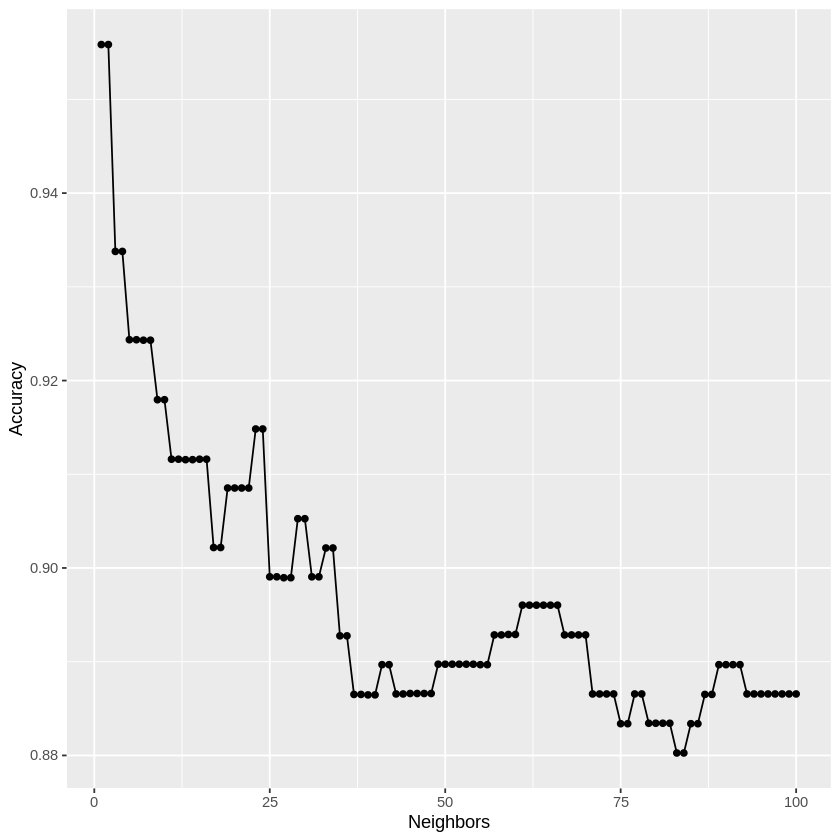

In [36]:
set.seed(1234) 

heart_recipe <- recipe(diagnosis ~., data = training_data) |>
    step_center(all_predictors()) |>
    step_scale(all_predictors())

heart_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

training_vfold <- vfold_cv(training_data, v = 5, strata = diagnosis)

values <- tibble(neighbors = seq(from = 1, to = 100, by = 1))

tuned_workflow <- workflow() |>
    add_recipe(heart_recipe) |>
    add_model(heart_spec) |>
    tune_grid(resamples = training_vfold, grid = values) |>
    collect_metrics() 

tuned_workflow <- tuned_workflow |>
    filter(.metric == "accuracy")

cross_val_plot <- ggplot(tuned_workflow, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    xlab("Neighbors") +
    ylab("Accuracy")

cross_val_plot

In [16]:
# Note: underfitting data, will have poor accuracy in testing data

spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 1) |>
    set_engine("kknn") |>
    set_mode("classification")

heart_fit <- workflow() |>
    add_recipe(heart_recipe) |>
    add_model(spec) |>
    fit(data = training_data)

heart_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_center()
• step_scale()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(1,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.02564103
Best kernel: rectangular
Best k: 1

## Discussion

#### Answer to the predictive question
The predictive question was whether age, blood pressure, heart rate, and cholesterol would affect the risk of developing heart disease. We answered this question by creating a classifier that diagnosed heart disease using ...


#### Expected findings vs outcomes

We expect to predict the diagnosis of heart disease by a person with a given age, blood pressure, heart rate, and cholesterol. We expect our prediction to be fairly accurate which would be indicated by a strong, direct relationship between the predictors and target variables. 

We expect that an older patient, with higher levels of cholesterol and blood pressure would be more prone to developing heart disease - supported by the logic discussed in the Introduction. 


#### Impact of the findings

The higher the accuracy of the findings, the more beneficial it is to the health sector. The findings can be used by health professionals such as doctors and researchers to accurately diagnose patients, or predict potential lifestyle choices that directly develop the risk factors.   It is important to consider, however, that the findings are not fully accurate but work in supporting the advancement of the medical system. 


#### Possible future questions:

- What leads to high levels of cholesterol and blood pressure?

- Is heart disease more likely to develop because of genetics or the environment? Or a combination of both? In what ratio?

- Are there other risk factors that accelerate the development of heart disease? 



## References

Watson, S. Amazing Facts About Heart Health and Heart Disease. WebMD. https://www.webmd.com/heart/features/amazing-facts-about-heart-health-and-heart-disease_.

National Institute of Aging. Heart Health and Aging. National Institute on Aging. https://www.nia.nih.gov/health/heart-health/heart-health-and-aging#:~:text=Adults%20age%2065%20and%20older.

Public Health England. Health matters: combating high blood pressure. GOV.UK. https://www.gov.uk/government/publications/health-matters-combating-high-blood-pressure/health-matters-combating-high-blood-pressure.

Centers for Disease Control and Prevention. Heart disease and stroke. Centers for Disease Control and Prevention. https://www.cdc.gov/chronicdisease/resources/publications/factsheets/heart-disease-stroke.htm.


In [17]:
source('cleanup.R')

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'cleanup.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection
